In [1]:
import os
import sys

import astropy.table as at
import corner
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
rnd = np.random.RandomState(seed=8675309)

In [2]:
K = 2
true_alpha = 3.21 
true_beta = 2.44

In [3]:
N = 3

t = at.Table()
t['x'] = np.round(np.sort(rnd.uniform(-5, 5, size=N)), 
                  decimals=1)
t['sigma_y'] = np.round(np.sort(rnd.uniform(0.5, 4, size=N)), 
                        decimals=1)
t['y'] = np.round(rnd.normal(true_alpha * t['x'] + true_beta,
                             t['sigma_y']),
                  decimals=1)

t.write('data1.csv', overwrite=True)
t.write(sys.stdout, format='ascii.latex')

\begin{table}
\begin{tabular}{ccc}
x & sigma_y & y \\
-1.4 & 0.8 & -2.4 \\
2.5 & 1.2 & 8.8 \\
3.1 & 1.9 & 13.8 \\
\end{tabular}
\end{table}


In [4]:
Cinv = np.diag(1 / t['sigma_y']**2)

Set up the design matrix:

In [5]:
M = np.ones((N, 2))
M[:, 0] = t['x']
M

array([[-1.4,  1. ],
       [ 2.5,  1. ],
       [ 3.1,  1. ]])

Note that this is equivalent to:

In [6]:
M = np.vander(t['x'], N=2)
M

array([[-1.4,  1. ],
       [ 2.5,  1. ],
       [ 3.1,  1. ]])

In [7]:
mu_alpha, sigma_alpha = (1, 5)
mu_beta, sigma_beta = (3, 2)

mu = np.array([mu_alpha, mu_beta])
Linv = np.diag([1 / sigma_alpha**2,
                1 / sigma_beta**2])

In [8]:
Ainv = Linv + M.T @ Cinv @ M
A = np.linalg.inv(Ainv)

In [9]:
a = A @ (Linv @ mu + M.T @ Cinv @ t['y'])

In [10]:
a

array([3.12622714, 2.03322352])

In [11]:
true_alpha, true_beta

(3.21, 2.44)

In [12]:
samples = rnd.multivariate_normal(a, A, size=4096)

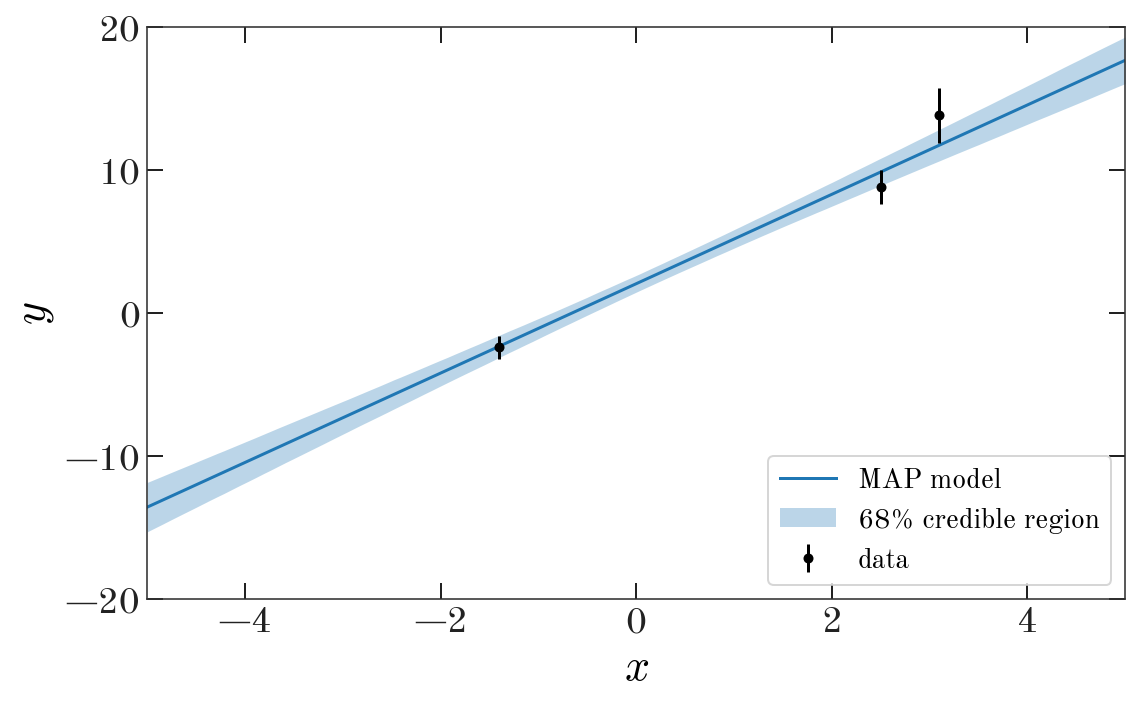

In [18]:
plt.figure(figsize=(8, 5))

plt.errorbar(t['x'], t['y'], t['sigma_y'], 
             ls='none', marker='o', zorder=10,
             label='data')

xpred = np.linspace(-5, 5, 128)
plt.plot(xpred, a[0] * xpred + a[1], 
         marker='', color='tab:blue', zorder=1,
         label='MAP model')

ypred = samples[:, 0][None] * xpred[:, None] + samples[:, 1][None]
yfill = np.percentile(ypred, q=[16, 84], axis=1)
plt.fill_between(xpred, yfill[0], yfill[1], 
                 zorder=0, color='tab:blue', alpha=0.3, lw=0,
                 label='68% credible region')

plt.xlim(-5, 5)
plt.ylim(-20, 20)

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='lower right', fontsize=14)

plt.tight_layout()
plt.savefig('../products/exercise1.pdf')

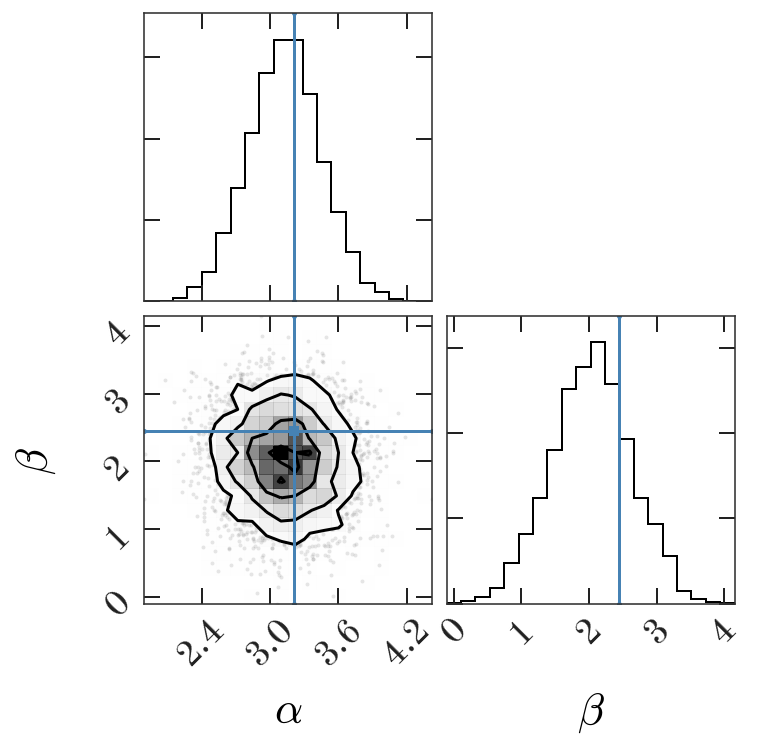

In [14]:
_ = corner.corner(samples, 
                  truths=[true_alpha, true_beta], 
                  labels=[r'$\alpha$', r'$\beta$'])